## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Reading CSV

In [84]:
dataset = pd.read_csv('Financial_Tweets.csv')

## Displaying first 5 rows of the dataset 

In [85]:
dataset.head()

,id,text,timestamp,source,symbols,company_names,url,verified,likes,dislikes
0,1.020000e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,100,10
1,1.020000e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True,100,10
2,1.020000e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,100,10
3,1.020000e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,100,10
4,1.020000e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,100,10


### Dropping the 'id' column

In [86]:
dataset = dataset.drop('id',axis=1)

In [87]:
dataset.head()

,text,timestamp,source,symbols,company_names,url,verified,likes,dislikes
0,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,100,10
1,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True,100,10
2,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,100,10
3,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,100,10
4,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,100,10


## Information of the dataset

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3500 non-null   float64
 1   text           3500 non-null   object 
 2   timestamp      3500 non-null   object 
 3   source         3500 non-null   object 
 4   symbols        3500 non-null   object 
 5   company_names  3499 non-null   object 
 6   url            2910 non-null   object 
 7   verified       3500 non-null   bool   
 8   likes          3500 non-null   int64  
 9   dislikes       3500 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 249.6+ KB


## Data Cleaning 

In [6]:
dataset.isnull().sum()

text               0
timestamp          0
source             0
symbols            0
company_names      1
url              590
verified           0
likes              0
dislikes           0
dtype: int64

### rather than removing the null url values, just replace them with http://www.NULL.com

In [7]:
dataset['url'] = dataset['url'].fillna('http://www.NULL.com')

## Statistics 

In [15]:
dataset.describe()

,likes,dislikes
count,3500.000000,3500.000000
mean,372.000000,146.810000
std,186.002571,211.491531
min,5.000000,5.000000
25%,250.000000,25.000000
50%,350.000000,30.000000
75%,500.000000,200.000000
max,1000.000000,1000.000000


### 1. Mean 

In [17]:
lmean = dataset.likes.mean()
dmean = dataset.dislikes.mean()
print(lmean, dmean)

372.0 146.81


### 2. Median 

In [18]:
lmed = dataset.likes.median()
dmed = dataset.dislikes.median()
print(lmed, dmed)

350.0 30.0


### 3. Mode 

In [21]:
lmode = dataset.likes.mode()
dmode = dataset.dislikes.mode()
print(lmode, dmode)

0    350
dtype: int64 0    25
dtype: int64


### 4. Standard Deviation 

In [22]:
lstd = dataset.likes.std()
dstd = dataset.dislikes.std()
print(lstd, dstd)

186.00257060917443 211.49153128455885


### 5. Variance 

In [23]:
lvar = dataset.likes.var()
dvar = dataset.dislikes.var()
print(lvar, dvar)

34596.95627322092 44728.66780508753


### 6. Range 

In [25]:
from scipy.stats import iqr
lrange = iqr(dataset['likes'])
drange = iqr(dataset['dislikes'])
print(lrange, drange)

250.0 175.0


### 7. Percentiles 

In [26]:
dataset.quantile(.2, axis = 0)

likes       250.0
dislikes     25.0
Name: 0.2, dtype: float64

## Visualization 

## Plotting the top 10 sources with the most financial tweets

Text(0.5, 1.0, 'Source with most number of tweets')

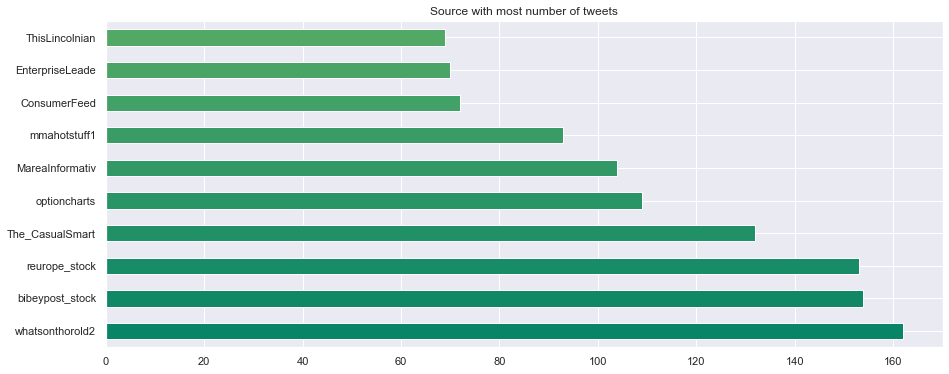

In [8]:
plt.figure(figsize=(15,6))
dataset['source'].value_counts()[:10].plot(kind='barh',color=sns.color_palette('summer',30))
plt.title('Source with most number of tweets')

## Plotting the top 10 url with the most tweets

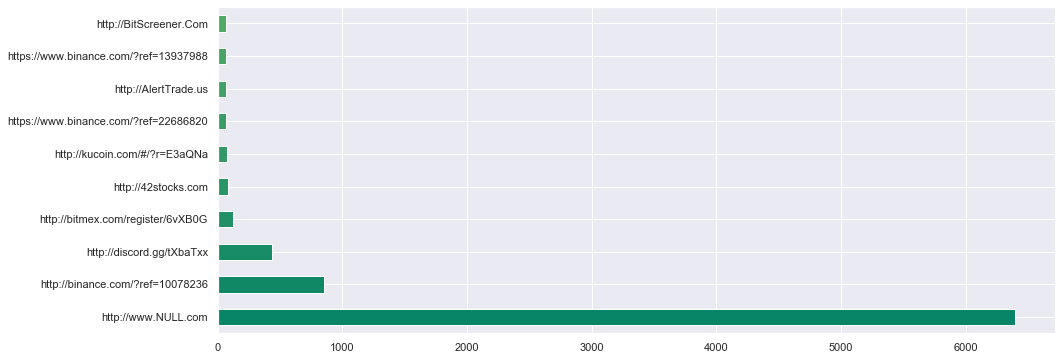

In [10]:
plt.figure(figsize=(15,6))
dataset['url'].value_counts()[:10].plot(kind='barh',color=sns.color_palette('summer',30))

## Plotting the top 30 talked about companies in the tweets

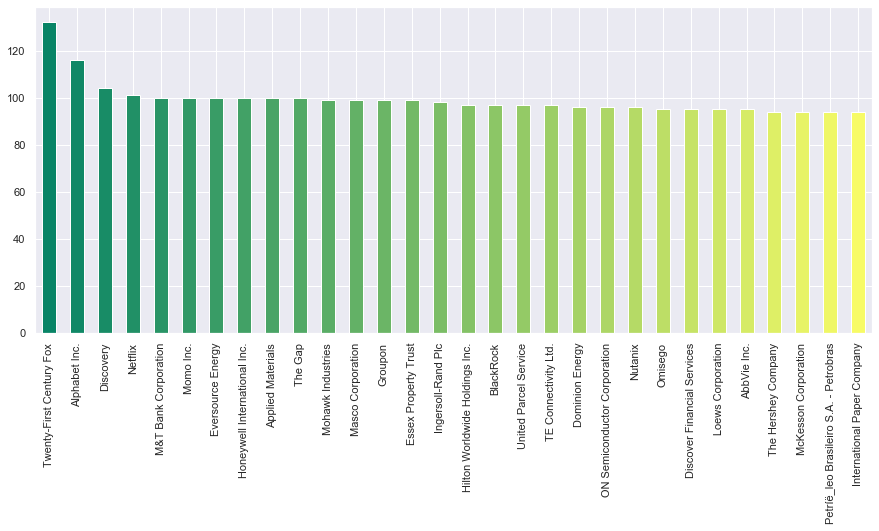

In [11]:
plt.figure(figsize=(15,6))
dataset['company_names'].value_counts()[:30].plot(kind='bar',color=sns.color_palette('summer',30))

### Plotting Distribution of likes 

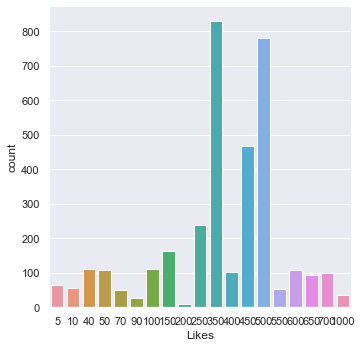

In [30]:
fig = sns.catplot("likes",data=dataset,kind='count',aspect=1)
fig.set_xlabels("Likes")

Text(0.5, 1.0, 'Distribution of likes for tweets')

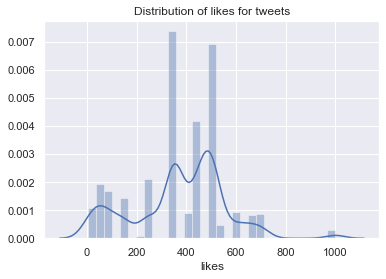

In [95]:
likes_dist_plot = sns.distplot(dataset['likes'])
likes_dist_plot.set_title("Distribution of likes for tweets")

### Plotting Distribution of dislikes 

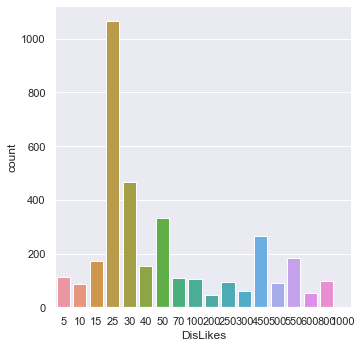

In [31]:
fig = sns.catplot("dislikes",data=dataset,kind='count',aspect=1)
fig.set_xlabels("DisLikes")

Text(0.5, 1.0, 'Distribution of dislikes for tweets')

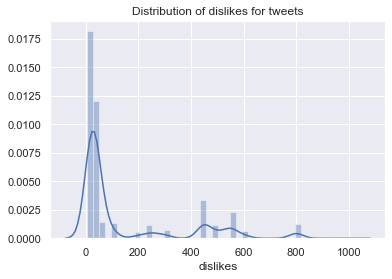

In [96]:
dislikes_dist_plot = sns.distplot(dataset['dislikes'])
dislikes_dist_plot.set_title("Distribution of dislikes for tweets")

### Plotting Distribution of Verified(True or False) 

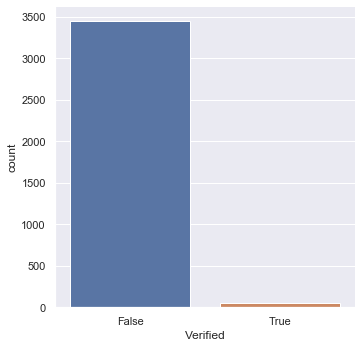

In [58]:
fig = sns.catplot("verified",data=dataset,kind='count',aspect=1)
fig.set_xlabels("Verified")

### Histogram 

Text(0.5, 1.0, 'Likes')

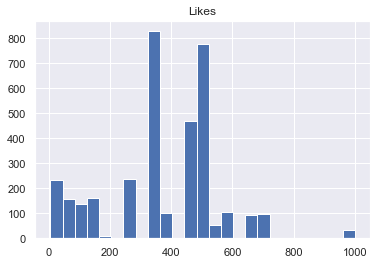

In [97]:
dataset.likes.hist(bins=25)
plt.title("Likes")

Text(0.5, 1.0, 'Dislikes')

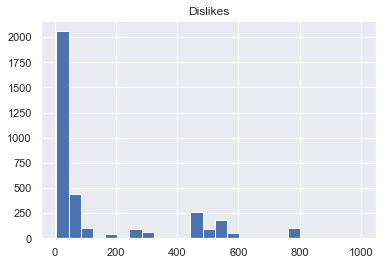

In [98]:
dataset.dislikes.hist(bins=25)
plt.title("Dislikes")

## Variable Transformation

### verfied column dtype is bool

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           3500 non-null   object
 1   timestamp      3500 non-null   object
 2   source         3500 non-null   object
 3   symbols        3500 non-null   object
 4   company_names  3499 non-null   object
 5   url            2910 non-null   object
 6   verified       3500 non-null   bool  
 7   likes          3500 non-null   int64 
 8   dislikes       3500 non-null   int64 
dtypes: bool(1), int64(2), object(6)
memory usage: 222.3+ KB


### changing the verified column dtype to object

In [94]:
mask = dataset.applymap(type) != bool
d = {True: 'TRUE', False: 'FALSE'}
dataset = dataset.where(mask, dataset.replace(d))

### verfied column dtype is object

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           3500 non-null   object
 1   timestamp      3500 non-null   object
 2   source         3500 non-null   object
 3   symbols        3500 non-null   object
 4   company_names  3499 non-null   object
 5   url            2910 non-null   object
 6   verified       3500 non-null   object
 7   likes          3500 non-null   int64 
 8   dislikes       3500 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 246.2+ KB


## Cleaning the Tweets

### using the NLTK and re libraries to clean up the text

In [9]:
pat1 = r'@[A-Za-z0-9]+' # this is to remove any text with @....
pat2 = r'https?://[A-Za-z0-9./]+'  # this is to remove the urls
combined_pat = r'|'.join((pat1, pat2)) 
pat3 = r'[^a-zA-Z]' # to remove every other character except a-z & A-Z
combined_pat2 = r'|'.join((combined_pat,pat3)) # we combine pat1, pat2 and pat3 to pass it in the cleaning steps

In [10]:
len(dataset['text'])

3500

### re.sub() will clean up the text

### tweets.lower() - converting text to lowercase

### tweets.split() - splits the sentence by each word

### ps.stem() - converts the words to lowest degree and we also remove all the stopwords from the text (for example: this, that, etc)

### ' '.join(tweets) - joins back the words to a sentence and separates them with a space


In [25]:
import nltk

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
cleaned_tweets = []

for i in range(0, len(dataset['text'])) :
    tweets = re.sub(combined_pat2,' ',dataset['text'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    cleaned_tweets.append(tweets)

In [12]:
cleaned_tweets[:10]

['video offic mind busi david solomon tell gs intern learn wa',
 'price lumber lb f sinc hit ytd high maci turnaround still happen',
 'say american dream dead',
 'barri silbert extrem optimist bitcoin predict new crypto entrant go zero',
 'satellit avoid attack space junk circl earth paid',
 'david butler favorit fang stock realmoneysod alphabet facebook',
 'miss convo one favorit thinker',
 'u intellig document nelson mandela made public',
 'senat want emerg alert go netflix spotifi etc',
 'hedg fund manag marc larsi say bitcoin k possibl']

In [28]:
dataset.columns

Index(['text', 'timestamp', 'source', 'symbols', 'company_names', 'url',
       'verified'],
      dtype='object')

In [29]:
dataset['cleaned_tweets'] = cleaned_tweets

In [30]:
dataset.columns

Index(['text', 'timestamp', 'source', 'symbols', 'company_names', 'url',
       'verified', 'cleaned_tweets'],
      dtype='object')

## Finding Polarity
### To find the polarity we use the SentimentIntensityAnalyzer from nltk.sentiment.vader 
### the polarity scores for each of the cleaned tweet (compound, positive, negative, neutral)

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for tweet in cleaned_tweets[:10]:
    print(tweet)
    s = sia.polarity_scores(tweet)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]), end='')
        print()

video offic mind busi david solomon tell gs intern learn wa
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
price lumber lb f sinc hit ytd high maci turnaround still happen
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
say american dream dead
compound: -0.5106, 
neg: 0.518, 
neu: 0.241, 
pos: 0.241, 
barri silbert extrem optimist bitcoin predict new crypto entrant go zero
compound: 0.5267, 
neg: 0.0, 
neu: 0.746, 
pos: 0.254, 
satellit avoid attack space junk circl earth paid
compound: -0.6486, 
neg: 0.469, 
neu: 0.531, 
pos: 0.0, 
david butler favorit fang stock realmoneysod alphabet facebook
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
miss convo one favorit thinker
compound: -0.1531, 
neg: 0.286, 
neu: 0.714, 
pos: 0.0, 
u intellig document nelson mandela made public
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
senat want emerg alert go netflix spotifi etc
compound: 0.3612, 
neg: 0.0, 
neu: 0.632, 
pos: 0.368, 
hedg fund manag marc larsi say bitcoin k possibl
compound: 0

### Now, based on the 'compound' polarity score and the knowledge of the data, we can choose which tweet falls in the categories of Positive, Negative and Neutral 

In [32]:
def findpolarity(data):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(data)
    if(polarity['compound'] >= 0.2):  
        sentiment = 1
    if(polarity['compound'] <= -0.2):
        sentiment = -1 
    if(polarity['compound'] < 0.2 and polarity['compound'] >-0.2):
        sentiment = 0     
    return(sentiment)

In [33]:
findpolarity(cleaned_tweets[0])

0

In [34]:
sentiment = []
for i in range(0, len(cleaned_tweets)):
    s = findpolarity(cleaned_tweets[i])
    sentiment.append(s)

In [35]:
len(sentiment)

3500

In [36]:
len(cleaned_tweets)

3500

### We create a new dataframe to store the cleaned tweets and their respective polarities and save them to a .csv file 

In [122]:
tweet_sentiment = pd.DataFrame()
tweet_sentiment['cleaned_tweets'] = cleaned_tweets
tweet_sentiment['sentiment'] = sentiment

In [123]:
tweet_sentiment.to_csv('tweet_sentiment.csv', index=False)

In [124]:
tweet_sentiment.shape[0]

3500

## Word Cloud

In [40]:
positive_tweet = []
negative_tweet = []
neutral_tweet = []

for i in range(0, tweet_sentiment.shape[0]):
    if tweet_sentiment['sentiment'][i] == 0:
        neutral_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == 1:
        positive_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == -1:
        negative_tweet.append(tweet_sentiment['cleaned_tweets'][i])

In [41]:
negative_tweet[:10]

['say american dream dead',
 'satellit avoid attack space junk circl earth paid',
 'u propos expedit appeal fight amp time warner purchas',
 'custom urg boycott mgm resort casino file lawsuit mass shoot victim',
 'ebay revenu miss weak u sport season hit stubhub',
 'arthur j gallagh amp co ajg vs marsh amp mclennan compani mmc critic contrast',
 'arthur j gallagh amp co ajg vs marsh amp mclennan compani mmc critic contrast',
 'wonder risk irm day volatil',
 'orli max pain matur maxpain option',
 'avb max pain matur maxpain option']

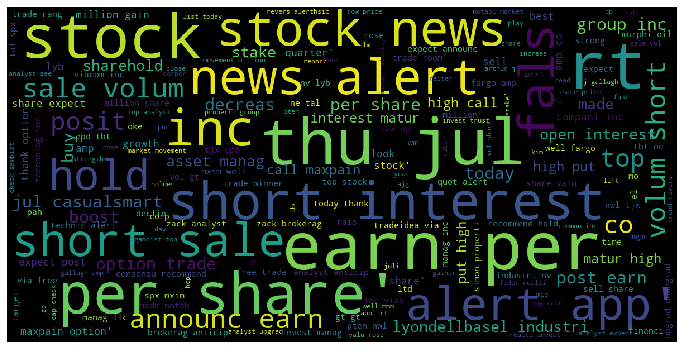

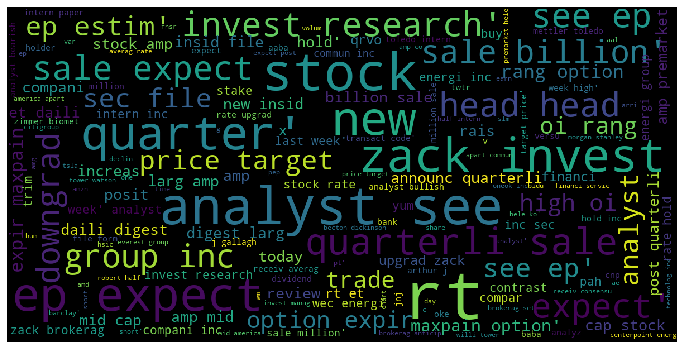

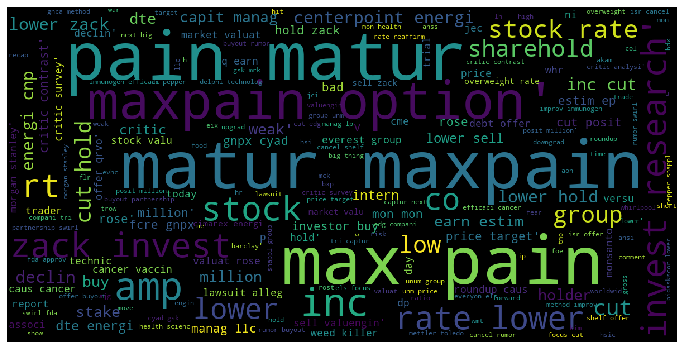

In [42]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(positive_tweet)
show_wordcloud(neutral_tweet)
show_wordcloud(negative_tweet)

### Now we will use CountVectorizer to create a sparse matrix from the cleaned tweets and define the DV and IV for the classification

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(tweet_sentiment['cleaned_tweets']).toarray()
y = tweet_sentiment['sentiment']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Building different models to decide which best suits for the dataset 

### 1. Naive Bayes' Model

In [90]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

In [93]:
cm

array([[ 39,  10,  14],
       [ 44, 138, 137],
       [  1,  14, 128]], dtype=int64)

In [94]:
print("Naive Bayes' Model Accuracy Score",score*100)

Naive Bayes' Model Accuracy Score 58.0952380952381


### 2. KNeighborsClassifier Model 

In [95]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 
  
# making predictions on the testing set 
yK_pred = knn.predict(X_test) 

In [96]:
cm = confusion_matrix(y_test, yK_pred)
score = accuracy_score(y_test, yK_pred)

In [97]:
cm

array([[ 27,  35,   1],
       [  5, 308,   6],
       [  0,  71,  72]], dtype=int64)

In [98]:
print("KNeighborsClassifier Model  Accuracy Score",score*100)

KNeighborsClassifier Model  Accuracy Score 77.52380952380953


### 3.  DecisionTreeClassifier Model

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
yD_pred = dt.predict(X_test) 
cm = confusion_matrix(y_test, yD_pred)
score = accuracy_score(y_test, yD_pred)
cm

array([[ 56,   5,   2],
       [  3, 311,   5],
       [  0,   5, 138]], dtype=int64)

In [100]:
print("DecisionTreeClassifier Model  Accuracy Score",score*100)

DecisionTreeClassifier Model  Accuracy Score 96.19047619047619


### 4.  LinearSVC Model

In [101]:
from sklearn.svm import LinearSVC 
svc = LinearSVC()
svc.fit(X_train, y_train)
ySVC_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, ySVC_pred)
score = accuracy_score(y_test, ySVC_pred)
cm

array([[ 50,  11,   2],
       [  6, 307,   6],
       [  1,   9, 133]], dtype=int64)

In [102]:
print("LinearSVC Model  Accuracy Score",score*100)

LinearSVC Model  Accuracy Score 93.33333333333333


### 5.  LogisticRegression Model

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)
yL_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, yL_pred)
score = accuracy_score(y_test, yL_pred)
cm

array([[ 46,  15,   2],
       [  3, 309,   7],
       [  0,  17, 126]], dtype=int64)

In [104]:
print("LogisticRegression Model  Accuracy Score",score*100)

LogisticRegression Model  Accuracy Score 91.61904761904762


### As a result,  DecisionTreeClassifier Model gives the highest accuracy score of 96.19%
### Hence, DecisionTreeClassifier Model bests suit for our dataset

## Model Chart 

In [80]:
import statsmodels.api as sm
X2_train = sm.add_constant(X_train)
results2 = sm.OLS(y_train, X2_train).fit()

In [87]:
X2_test = sm.add_constant(X_test)
y2_preds = results2.predict(X2_test)

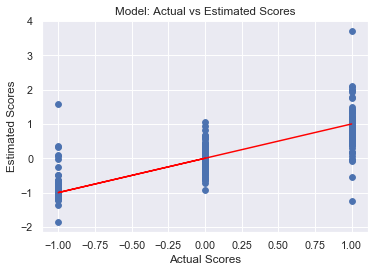

In [88]:
plt.figure(dpi = 70)
plt.scatter(y_test, y2_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

### Estimated scores of the positive sentiments goes on increasing 